## Training Set Sampling and Energy Distribution Plot

In [ ]:
import pandas as pd
import numpy as np

df_1 = pd.read_csv('ani_s01.csv') # generated by convert.py
df_2 = pd.read_csv('ani_s02.csv')
df_3 = pd.read_csv('ani_s03.csv')

In [ ]:
def sample_conformers_per_formula(csv_file, output_file, sample_size=1000, seed=42):
    df = pd.read_csv(csv_file)

    df_unique = df.drop_duplicates(subset=["molecule_id"])

    grouped = df_unique.groupby("formula")
    
    selected_ids = []

    rng = np.random.default_rng(seed)

    for formula, group in grouped:
        ids = group["molecule_id"].unique()
        sample_n = min(len(ids), sample_size)
        sampled_ids = rng.choice(ids, size=sample_n, replace=False)
        selected_ids.extend(sampled_ids)

    df_filtered = df[df["molecule_id"].isin(selected_ids)]

    df_filtered.to_csv(output_file, index=False)
    print(f"Saved {len(selected_ids)} unique conformers across all formulas to {output_file}")

sample_conformers_per_formula("ani_s01.csv", "ani_s01_sampled_100.csv", sample_size=100)

Saved 300 unique conformers across all formulas to ani_s01_sampled_100.csv


In [24]:
sample_conformers_per_formula("ani_s02.csv", "ani_s02_sampled_100.csv", sample_size=100)

Saved 1300 unique conformers across all formulas to ani_s02_sampled_100.csv


In [25]:
sample_conformers_per_formula("ani_s03.csv", "ani_s03_sampled_100.csv", sample_size=100)

Saved 1400 unique conformers across all formulas to ani_s03_sampled_100.csv


In [26]:
sample_conformers_per_formula("ani_s04.csv", "ani_s04_sampled_100.csv", sample_size=100)

Saved 2900 unique conformers across all formulas to ani_s04_sampled_100.csv


In [ ]:
df_1 = pd.read_csv('ani_s01_sampled_100.csv')
df_2 = pd.read_csv('ani_s02_sampled_100.csv')
df_3 = pd.read_csv('ani_s03_sampled_100.csv')
df_4 = pd.read_csv('ani_s04_sampled_100.csv')

In [ ]:
def add_prefix(df, prefix):
    df = df.copy()
    df['molecule_id'] = prefix + df['molecule_id'].astype(str)
    return df

df1 = add_prefix(df_1, 'f1_')
df2 = add_prefix(df_2, 'f2_')
df3 = add_prefix(df_3, 'f3_')
df4 = add_prefix(df_4, 'f4_')

combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [ ]:
combined_df.to_csv("ani_s01-4_sampled_100.csv", index=False)

## Inference Results Plot

### True Energy vs. Predicted Energy

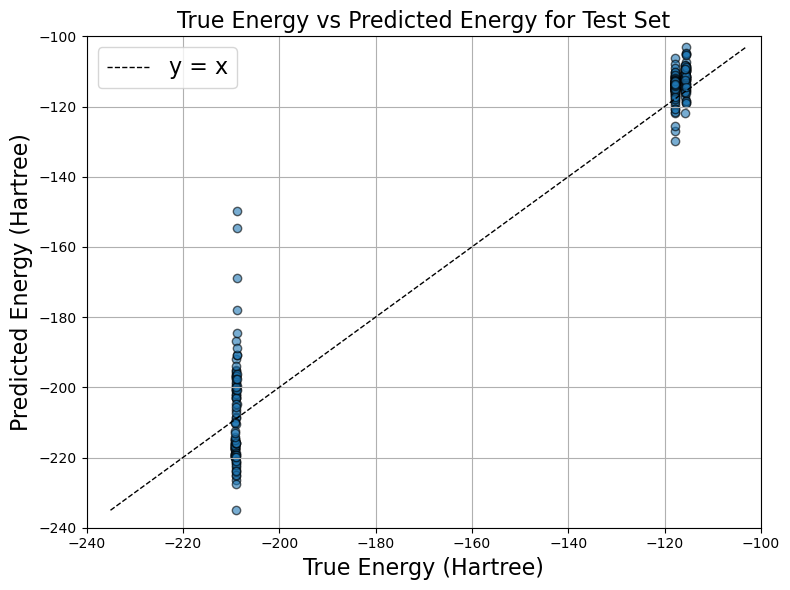

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("predictions.csv")

plt.figure(figsize=(8, 6))
plt.scatter(df["true_energy"], df["predicted_energy"], alpha=0.6, edgecolors="k")

min_val = min(df["true_energy"].min(), df["predicted_energy"].min())
max_val = max(df["true_energy"].max(), df["predicted_energy"].max())
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--", linewidth=1, label="y = x")

plt.xlabel("True Energy (Hartree)", fontsize=16)
plt.ylabel("Predicted Energy (Hartree)", fontsize=16)
plt.title("True Energy vs Predicted Energy for Test Set", fontsize=16)
plt.legend(fontsize=16)
plt.xlim(-240, -100)
plt.ylim(-240, -100)
plt.grid(True)
plt.tight_layout()
plt.savefig("scatter_plot.png", dpi=300)
plt.show()

### Predicted Energy vs. Distance Plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# csv generated by lj_plot.cpp
df = pd.read_csv("lj_output.csv")

plt.figure(figsize=(6, 4))
plt.plot(df["distance"], df["predicted_energy"], marker='o', linewidth=1.5)
plt.xlabel("Distance (Å)")
plt.ylabel("Predicted Pair Energy (Hartree)")
plt.title("Predicted Pair Energy vs Distance")
plt.grid(True)
plt.tight_layout()
plt.show()